## github地址：https://github.com/Liu8018/DataMiningCourse

## 1 读入数据

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# 读入数据
data_src = pd.read_csv("./Data/records-for-2016.csv")
# 移除无用属性：数据记录时间、记录编号等，移除重复作用的属性
data_src = data_src.drop(['Agency','Create Time','Closed Time','Event Number'], axis=1)
# 全部属性转化为字符串类型
data_src['Incident Type Id'] = data_src['Incident Type Id'].astype(str)
data_src['Priority'] = data_src['Priority'].astype(str)
data_src['Beat'] = data_src['Beat'].astype(str)
data_src['Area Id'] = data_src['Area Id'].astype(str)
data_src['Location'] = data_src['Location'].astype(str)

# 每列元素添加前缀
data_src['Location']= '[Loc] ' + data_src['Location'].str[:]
data_src['Area Id']= '[Area] ' + data_src['Area Id'].str[:]
data_src['Beat']= '[Beat] ' + data_src['Beat'].str[:]
data_src['Priority']= '[Pri] ' + data_src['Priority'].str[:]
data_src['Incident Type Id']= '[Type] ' + data_src['Incident Type Id'].str[:]
data_src['Incident Type Description']= '[Desc] ' + data_src['Incident Type Description'].str[:]

data_src

,Location,Area Id,Beat,Priority,Incident Type Id,Incident Type Description
0,[Loc] ST&MARKET ST,[Area] P1,[Beat] 05X,[Pri] 2,[Type] 415GS,[Desc] 415 GUNSHOTS
1,[Loc] AV&HAMILTON ST,[Area] P3,[Beat] 26Y,[Pri] 2,[Type] 415GS,[Desc] 415 GUNSHOTS
2,[Loc] ST&CHESTNUT ST,[Area] P1,[Beat] 02X,[Pri] 2,[Type] 415GS,[Desc] 415 GUNSHOTS
3,[Loc] WALLACE ST,[Area] P2,[Beat] 18Y,[Pri] 2,[Type] 415GS,[Desc] 415 GUNSHOTS
4,[Loc] 90TH AV,[Area] P3,[Beat] 34X,[Pri] 2,[Type] 415GS,[Desc] 415 GUNSHOTS
...,...,...,...,...,...,...
110822,[Loc] WENDY'S ST&PINE ST,[Area] P1,[Beat] 02Y,[Pri] 2,[Type] 922,[Desc] DRUNK ON THE STREET
110823,[Loc] WHITMORE ST&WOOD ST,[Area] P1,[Beat] 02Y,[Pri] 2,[Type] 415GS,[Desc] 415 GUNSHOTS
110824,[Loc] WHITTLE 69TH AV,[Area] P3,[Beat] 26Y,[Pri] 2,[Type] 415N,[Desc] DISTURBANCE-NEIGHBOR
110825,[Loc] WHITTLE LOOMIS CT,[Area] P2,[Beat] 19X,[Pri] 2,[Type] 912,[Desc] SUSPICIOUS PERSON


## 2 对数据集进行处理，转换成适合进行关联规则挖掘的形式

In [3]:
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

# 编码
encoder = TransactionEncoder()
data_enc = encoder.fit_transform(data_src.values.tolist())
data_enc = pd.DataFrame(data_enc, columns = encoder.columns_)

data_enc

,[Area] JLS,[Area] P1,[Area] P2,[Area] P3,[Area] PCW,[Area] POU,[Area] TEC,[Area] WAG,[Beat] 01X,[Beat] 02X,...,[Type] TARA,[Type] TRUANT,[Type] UNSEC,[Type] VICTIM,[Type] WALKTR,[Type] WATER,[Type] WELCK,[Type] WIRES,[Type] WIT,[Type] YELALT
0,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,True,False,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
3,False,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110822,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
110823,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
110824,False,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
110825,False,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


## 3 找出频繁模式，计算关联规则

In [4]:
# 利用Apriori算法找出频繁项集
freqItemSets = apriori(data_enc, min_support = 0.05, use_colnames = True)

# 计算关联规则
rules = association_rules(freqItemSets, metric = 'confidence' ,min_threshold = 0.3)

# 按置信度排序
rules = rules.sort_values('confidence')
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,([Pri] 1),([Area] P1),0.221562,0.373727,0.076606,0.345754,0.925153,-0.006198,0.957245
2,([Pri] 2),([Area] P1),0.778438,0.373727,0.297121,0.381688,1.021303,0.006198,1.012876
6,([Pri] 2),([Area] P3),0.778438,0.427919,0.322611,0.414433,0.968485,-0.010498,0.976970
4,([Pri] 1),([Area] P3),0.221562,0.427919,0.105308,0.475300,1.110725,0.010498,1.090301
5,([Area] P3),([Pri] 2),0.427919,0.778438,0.322611,0.753906,0.968485,-0.010498,0.900313
3,([Area] P2),([Pri] 2),0.176942,0.778438,0.138143,0.780724,1.002936,0.000404,1.010424
1,([Area] P1),([Pri] 2),0.373727,0.778438,0.297121,0.795022,1.021303,0.006198,1.080902
13,([Type] 415),([Pri] 2),0.071129,0.778438,0.065580,0.921984,1.184402,0.010210,2.839951
7,([Desc] ALARM-RINGER),([Pri] 2),0.091079,0.778438,0.089121,0.978502,1.257006,0.018222,10.306185
20,([Type] 933R),"([Pri] 2, [Desc] ALARM-RINGER)",0.091079,0.089121,0.089121,0.978502,10.979493,0.081004,42.370571


## 4 结果分析
上面展示的关联规则，使用了lift(提升度)、leverage(杠杆率)、conviction(确信度)三种评价指标，按照置信度从小到大排序。越下面的规则关联越强。

可见关联最强的规则大多都是Type(类型)和Desc(描述)。这是显然的，因为类型和描述基本上是对应的关系。除此之外就是Type和priority，如第15条规则表示，当犯罪类型为SECCK(安检)时，对应的priority大多为2.

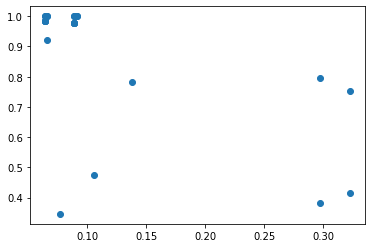

In [5]:
# 绘制支持度和置信度的关系图
plt.scatter(rules['support'].values.tolist(),rules['confidence'].values.tolist())